In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 


In [3]:
df=pd.read_csv("CO2_emission.csv")

In [4]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [6]:
df['Vehicle_Class'].unique()

array(['Compact', 'Two-seater', 'SUV: Small', 'Mid-size', 'Minicompact',
       'SUV: Standard', 'Station wagon: Small', 'Subcompact',
       'Station wagon: Mid-size', 'Full-size', 'Pickup truck: Small',
       'Pickup truck: Standard', 'Minivan', 'Van: Passenger',
       'Special purpose vehicle'], dtype=object)

#                                                                   Data visualization 

Text(0, 0.5, 'Vehicle Class')

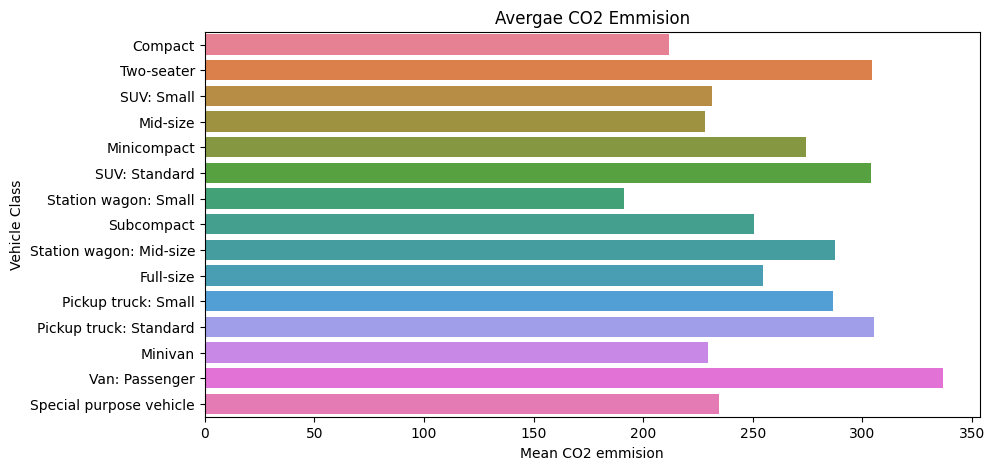

In [7]:
avg_co2_values=[]
for i in df['Vehicle_Class'].unique() :
    mean_co2_cat=df[df['Vehicle_Class']== i]['CO2_Emissions'].mean()
    avg_co2_values.append(mean_co2_cat)
plt.figure(figsize=(10,5))
plt.title("Avergae CO2 Emmision")
sns.barplot(x=avg_co2_values,y=df['Vehicle_Class'].unique(),palette="husl")
plt.xlabel("Mean CO2 emmision")
plt.ylabel("Vehicle Class")

In [25]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
df_num_columns=[i for i in df.columns if df[i].dtype != "O" ]    
df_cat_columns=[i for i in df.columns if i not in df_num_columns]
df_num_columns.remove("Smog_Level")
Transformer=ColumnTransformer(transformers=[("StandardScaler",StandardScaler(),df_num_columns),("OrdinalEncoder",OrdinalEncoder(),df_cat_columns)],
                              )
x=df.drop(columns=['Smog_Level'])
y=df['Smog_Level']
x=Transformer.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [38]:
y_test

321    6
70     7
209    3
549    1
712    7
      ..
595    3
669    3
307    6
351    5
741    5
Name: Smog_Level, Length: 234, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
mm=LogisticRegression(x_train,y_train)

In [44]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,f1_score,recall_score,accuracy_score

models={"LogisticRegression":LogisticRegression(),"DecisionTreeClassifier":DecisionTreeClassifier()
        ,"Random Forest Classifier":RandomForestClassifier,"Adaboost Classifier":AdaBoostClassifier(),
        "KNeighbour Classifier":KNeighborsClassifier()}

for model_name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_proba=model.predict_proba(x_test)

    ## Scores 
    # roc_auc_score=roc_auc_score(y_test,y_pred_proba[:,1])
    f1_score=f1_score(y_test,y_pred)
    recall_score=recall_score(y_test,y_pred)
    accuracy_score=accuracy_score(y_test,y_pred)

    print("==========================================================")
    print(f"                   {model_name} Scores :      ")
    print(f"-accuracy score : {accuracy_score}")
    print(f"-f1 score : {f1_score}")
    print(f"-recall_score: {recall_score}")
    # print(f"-roc auc score : {roc_auc_score}")


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].